In [1]:
conda install -c conda-forge imbalanced-learn

^C

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge boruta_py

^C

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge lightgbm

^C

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install scikit-learn

^C

Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from eli5.sklearn import PermutationImportance
from boruta import BorutaPy


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter 
import matplotlib.ticker as mtick

In [3]:
app_train = pd.read_csv(r'C:\Users\Admin\Documents\GitHub\CreditRiskML\data/loan1.csv')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

app_train.head(200)

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,4,33,4,1,7253,1,4,3,3,1,2,3,35,3,2,2,4,1,2,1
196,1,4,6,4,0,6761,1,4,1,3,1,3,4,45,3,2,2,4,2,2,1
197,1,4,18,4,2,1817,1,3,4,2,1,2,4,28,3,2,2,3,1,1,1
198,1,4,12,2,3,2141,2,4,3,3,1,1,4,35,3,2,1,3,1,1,1


In [5]:
featurenames =    ['Creditability','Account_Balance', 'Duration_of_Credit_monthly', 'Payment_Status_of_Previous_Credit',  'Credit_Amount', 'Value_Savings_Stocks',  'Length_of_current_employment',
   'Most_valuable_available_asset', 'Age_years', 'No_of_Credits_at_this_Bank', 'Occupation', 'Foreign_Worker']

In [6]:
def yfromX(X):
    y = X['Creditability'] + X['Duration_of_Credit_monthly']**2 + np.sin(3 * X['Account_Balance']) + (X['Payment_Status_of_Previous_Credit'] * X['Credit_Amount'] * X['Age_years'])
    return y

In [7]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

X = pd.DataFrame(np.random.normal(size = (20000, len(featurenames))), columns = featurenames)
y = yfromX(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [8]:
rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train, y_train)

rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

rf_train_mae = mean_absolute_error(y_train, rf_train_preds)
rf_test_mae = mean_absolute_error(y_test, rf_test_preds)

rf_fi = rf.feature_importances_

In [9]:
new_rf = RandomForestRegressor(n_jobs = -1, max_depth = 5)

boruta_selector = BorutaPy(new_rf, n_estimators = 'auto', random_state = 0)
boruta_selector.fit(np.array(X_train), np.array(y_train))

boruta_ranking = boruta_selector.ranking_
selected_features = np.array(featurenames)[boruta_ranking <= 2]

In [10]:
boruta_ranking = pd.DataFrame(data=boruta_ranking, index=X_train.columns.values, columns=['values'])
boruta_ranking['Variable'] = boruta_ranking.index
boruta_ranking.sort_values(['values'], ascending=True, inplace=True)

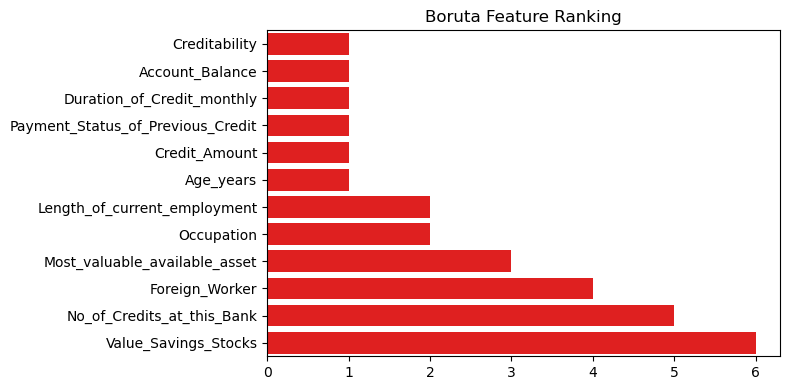

In [11]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x='values',y='Variable',data=boruta_ranking, color='r')
plt.title('Boruta Feature Ranking')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [14]:
# SVM Model
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# SVM Evaluation
svc_acc = accuracy_score(y_test, svc_pred)
svc_cm = confusion_matrix(y_test, svc_pred)
svc_cr = classification_report(y_test, svc_pred)

print('SVM Accuracy: ', svc_acc)
print('SVM Confusion Matrix: \n', svc_cm)
print('SVM Classification Report: \n', svc_cr)

ValueError: Unknown label type: 'continuous'